In [649]:
import pandas as pd
import numpy as np
import colorcet as cc
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from datetime import datetime


ModuleNotFoundError: No module named 'geopandas'

In [607]:
# Load data set --> source: https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified
df = pd.read_csv('apartments_for_rent_classified_10K.csv', sep=";", encoding='cp1252')


In [608]:
"""
** Additional Variable Information
id = unique identifier of apartment
category = category of classified
title = title text of apartment
body = body text of apartment
amenities = like AC, basketball,cable, gym, internet access, pool, refrigerator etc.
bathrooms = number of bathrooms
bedrooms = number of bedrooms
currency = price in current
fee = fee
has_photo = photo of apartment
pets_allowed = what pets are allowed dogs/cats etc.
price = rental price of apartment
price_display = price converted into display for reader
price_type = price in USD
square_feet = size of the apartment
address = where the apartment is located
cityname = where the apartment is located
state = where the apartment is located
latitude = where the apartment is located
longitude = where the apartment is located
source = origin of classified
time = when classified was created
"""
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


### Simple EDA of a given data

In [609]:
# Exploring missing values in features
print(df.isnull().sum())
print(f"\n{('=')*50}\n")

for column_name in df.columns:
    missing_values_mask = df[column_name].isnull()
    missing_values_count = missing_values_mask.sum()
    total_rows = df.shape[0]
    percentage_missing = (missing_values_count / total_rows) * 100
    
    if percentage_missing > 0.05:
        print(f"Percentage of missing values in '{column_name}': {percentage_missing:.2f}%")

# Below we can see that 'amenities', 'pets_allowed' and 'address' has a relatively big percentage of missing data 
# For the other features we can consider either populating or dropping them as its should not impact analysis 

id                  0
category            0
title               0
body                0
amenities        3549
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     4163
price               0
price_display       0
price_type          0
square_feet         0
address          3327
cityname           77
state              77
latitude           10
longitude          10
source              0
time                0
dtype: int64


Percentage of missing values in 'amenities': 35.49%
Percentage of missing values in 'bathrooms': 0.34%
Percentage of missing values in 'bedrooms': 0.07%
Percentage of missing values in 'pets_allowed': 41.63%
Percentage of missing values in 'address': 33.27%
Percentage of missing values in 'cityname': 0.77%
Percentage of missing values in 'state': 0.77%
Percentage of missing values in 'latitude': 0.10%
Percentage of missing values in 'longitude': 0.10%


In [610]:
# Getting rid of unnecessary information
df_1 = df.copy()

# Drop unnecessary columns
columns_to_drop = ['title', 'body', 'currency', 'fee', 'price_display', 'address', 'id']
df_1 = df.drop(columns=columns_to_drop, inplace=False)

# Drop unnecessary rows
df_1 = df_1.dropna(subset=['bathrooms', 'bedrooms', 'price', 'latitude', 'longitude'])
df_1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9950 entries, 2 to 9999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   category      9950 non-null   object 
 1   amenities     6442 non-null   object 
 2   bathrooms     9950 non-null   float64
 3   bedrooms      9950 non-null   float64
 4   has_photo     9950 non-null   object 
 5   pets_allowed  5820 non-null   object 
 6   price         9950 non-null   int64  
 7   price_type    9950 non-null   object 
 8   square_feet   9950 non-null   int64  
 9   cityname      9883 non-null   object 
 10  state         9883 non-null   object 
 11  latitude      9950 non-null   float64
 12  longitude     9950 non-null   float64
 13  source        9950 non-null   object 
 14  time          9950 non-null   int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 1.2+ MB


In [611]:
# Exploring feature 'pets_allowed'
# Fill in missing values in 'pets_allowed' to '0' assuming that all empty values indicate to no pet zone
df_1['pets_allowed'].fillna(0, inplace=True) 

# Here on the other hand we haved assumed that missing data is no pet zone than all 
# the other data does allow pets, so we can indicate it as 1
df_1['pets_allowed'].replace(['Dogs', 'Cats', 'Cats,Dogs'], 1, inplace=True)

# Convert 'pets_allowed' column to categorical
df_1['pets_allowed'] = pd.Categorical(df_1['pets_allowed'], categories=[0, 1], ordered=False)


In [612]:
# Exploring features 'cityname' and 'state'
# Find out the either one missing value weather be it City or State that could be mapped using long and lat
df_1.loc[df_1['cityname'].isna() | df_1['state'].isna(), ['longitude', 'latitude']].value_counts()


longitude  latitude
-98.5576   39.8163     66
-82.1971   28.4590      1
Name: count, dtype: int64

#### As we can see we have to coordinates, using google search we can find the exact address based on that information 
#### So first row indicates that its address is --> 28032 Main Street, Lebanon, KS 66952 Lebanon Kansas United States 
#### The second row indicates that its address is --> 37403 Polite Avenue, Dade City, FL 33523 Dade City Florida United States 
#### Using that information we can fill in those missing values

In [613]:
df_1.loc[((df_1['cityname'].isna()) | (df_1['state'].isna())) & (df_1['longitude']==-98.5576), 'cityname'] = 'Lebanon'
df_1.loc[((df_1['cityname'].isna()) | (df_1['state'].isna())) & (df_1['longitude']==-98.5576), 'state'] = 'KS'
df_1.loc[((df_1['cityname'].isna()) | (df_1['state'].isna())) & (df_1['longitude']==-82.1971), 'cityname'] = 'Dade'
df_1.loc[((df_1['cityname'].isna()) | (df_1['state'].isna())) & (df_1['longitude']==-82.1971), 'state'] = 'FL'

# Afte mapping we can drop th rest of the missing values 
df_1 = df_1.dropna(subset=['cityname', 'state'])
df_1.loc[:, ['cityname', 'state']].isna().sum()

cityname    0
state       0
dtype: int64

In [614]:
# Exploring feature 'amenities'
print(f"There are a total of ({df_1.amenities.isnull().sum()}) missing 'amenities'.")
df_1.amenities.value_counts()


There are a total of (3508) missing 'amenities'.


amenities
Parking                                                                                                                                 229
Dishwasher,Refrigerator                                                                                                                 225
Pool                                                                                                                                    168
Dishwasher,Parking,Pool                                                                                                                 149
Dishwasher                                                                                                                              147
                                                                                                                                       ... 
Cable or Satellite,Dishwasher,Internet Access,Parking                                                                                     1
Cable or S

#### After carefully exploring table above we can assume that all the missing values in 'amenities' refers to basic things. So we can divide 'amenities' into 2 categories to basic and advanced. 

In [615]:
# List of amenities considered advanced class
advanced_amenities = ['Clubhouse', 'Fireplace', 'Hot Tub', 'Parking', 'Pool',
                      'View', 'Basketball', 'Doorman', 'Storage', 'Patio/Deck']

# Define a function to classify amenities
def classify_amenities(amenities):
    if pd.isna(amenities):
        return 0  # If amenities are missing, classify as 0 meaning its 'basic' 
    else:
        amenity_list = amenities.split(',')
        for amenity in amenity_list:
            if amenity.strip() in advanced_amenities:
                return 1 # If amenities contain one of the items from the advanced_amenities, classify as 1, meaning its advanced
        return 0

# Apply the function to create a new column 'amenity_class'
df_1['amenity_class'] = df_1['amenities'].apply(classify_amenities)

# We drop 'amenities' column because as of now it hold no value for analysis
df_1 = df_1.drop(columns=['amenities'])
df_1['amenity_class'].value_counts()

amenity_class
1    5681
0    4269
Name: count, dtype: int64

In [616]:
# Double-checking missing values in the data set
df_1.isna().sum()

category         0
bathrooms        0
bedrooms         0
has_photo        0
pets_allowed     0
price            0
price_type       0
square_feet      0
cityname         0
state            0
latitude         0
longitude        0
source           0
time             0
amenity_class    0
dtype: int64

In [617]:
# Exploring feature 'source'
print((df_1.source.value_counts()))

# Because the most popular websites with the majority of records are 'RentLingo' and 'RentDigs.com' we can just say in it's not any of there its calssified as 'other'
df_1.loc[(df_1['source']!='RentDigs.com') & (df_1['source'] != 'RentLingo'), 'source'] = 'others'


source
RentLingo            6869
RentDigs.com         2763
ListedBuy             177
RealRentals            69
GoSection8             30
Listanza               20
RENTOCULAR             16
rentbits                2
Home Rentals            1
Real Estate Agent       1
RENTCafé                1
tenantcloud             1
Name: count, dtype: int64


In [618]:
# Exploring feature 'has_photo'
print(df_1.has_photo.value_counts())

# 'Thumbnail' is a small version of an image or video that is used as a preview. Because of that fact we can assume that all values that are 'Thumbnail' imply 'Yes'.
df_1['has_photo'].replace('Thumbnail', 'Yes', inplace=True)


# Map 'No' to 0 and 'Yes' to 1 to make it as categorical feature
df_1['has_photo'] = pd.Categorical.from_codes(df_1['has_photo'].map({'No': 0, 'Yes': 1}), categories=[0, 1], ordered=False)
print(' ')
df_1['has_photo'].info()



has_photo
Thumbnail    8858
Yes           909
No            183
Name: count, dtype: int64
 
<class 'pandas.core.series.Series'>
Index: 9950 entries, 2 to 9999
Series name: has_photo
Non-Null Count  Dtype   
--------------  -----   
9950 non-null   category
dtypes: category(1)
memory usage: 87.6 KB


In [619]:
# Descriptive statistics of continues features. We do not consider time as it's not continues feature, 
# and it's not in the right format yet 
numer_col = ['bathrooms', 'bedrooms', 'price', 'square_feet']  
df_1.loc[:, numer_col].describe()

,bathrooms,bedrooms,price,square_feet
count,9950.000000,9950.000000,9950.000000,9950.000000
mean,1.380553,1.747538,1487.585930,943.271055
std,0.615313,0.941543,1077.350394,526.416278
min,1.000000,0.000000,200.000000,107.000000
25%,1.000000,1.000000,950.000000,650.000000
50%,1.000000,2.000000,1275.000000,803.000000
75%,2.000000,2.000000,1695.000000,1100.000000
max,8.500000,9.000000,52500.000000,11318.000000


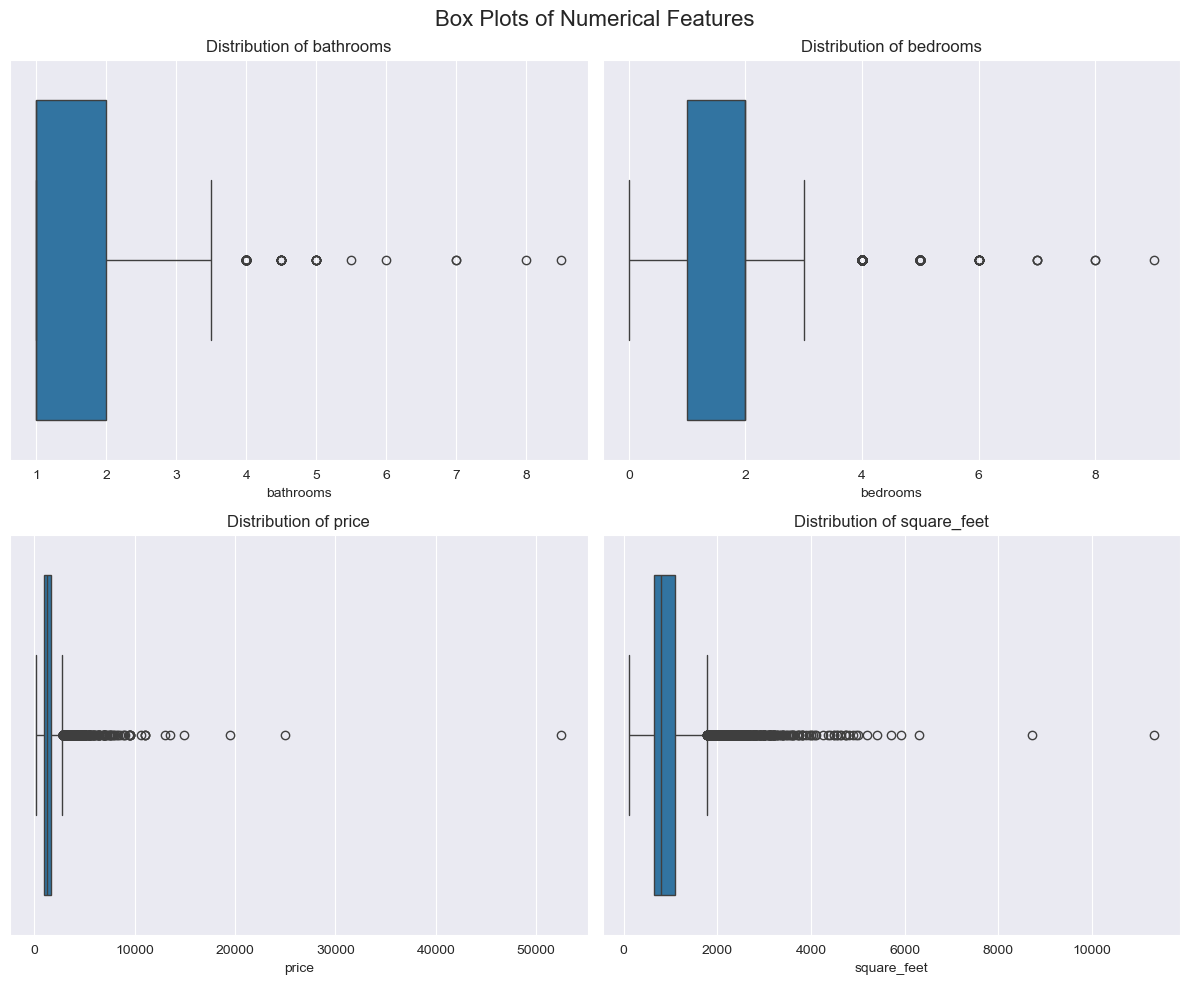

In [620]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Loop through numerical features and their corresponding axis
for i, (feature, ax) in enumerate(zip(numer_col, axs)):
    # Create box plot using Seaborn
    sns.boxplot(x=df_1[feature], ax=ax)
    ax.set_title(f'Distribution of {feature}')

fig.suptitle('Box Plots of Numerical Features', fontsize=16)
plt.tight_layout()

# Show the plots
plt.show()



#### Description of Numerical Features for above box plots:

- ##### **Bedrooms Distribution:** The distribution of bedrooms appears to be right skewed, with more houses having fewer bedrooms.

- ##### **Price Distribution:** The distribution of price is also skewed, with more houses having a lower price.

- ##### **Bathrooms and Square Footage Distributions:** The distributions of bathrooms and square footage appear more symmetrical.



In [621]:
# Exploring feature 'price_type'

print(df_1['price_type'].value_counts())


# In here we can see that there is only one record showing weekly payment method
# We can drop that record as it could potentially create a bias or the other method would be considering converting 'Monthly' payments into the 'Weekly' ones performing down sampling. But for now we would consider only Monthly

# Drop rows where payment method is 'Weekly'
df_1 = df_1[df_1['price_type'] != 'Weekly']
df_1['price_type'].value_counts()


price_type
Monthly    9949
Weekly        1
Name: count, dtype: int64


price_type
Monthly    9949
Name: count, dtype: int64

In [622]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9949 entries, 2 to 9999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   category       9949 non-null   object  
 1   bathrooms      9949 non-null   float64 
 2   bedrooms       9949 non-null   float64 
 3   has_photo      9949 non-null   category
 4   pets_allowed   9949 non-null   category
 5   price          9949 non-null   int64   
 6   price_type     9949 non-null   object  
 7   square_feet    9949 non-null   int64   
 8   cityname       9949 non-null   object  
 9   state          9949 non-null   object  
 10  latitude       9949 non-null   float64 
 11  longitude      9949 non-null   float64 
 12  source         9949 non-null   object  
 13  time           9949 non-null   int64   
 14  amenity_class  9949 non-null   int64   
dtypes: category(2), float64(4), int64(4), object(5)
memory usage: 1.1+ MB


In [623]:
# Exploring feature 'category'
print(df_1['category'].value_counts(), '\n')

# There are only two instances of 'housing/rent/home' category and only one for 'housing/rent/short_term'.
# So we can drop two records for 'housing/rent/home' as they could contribute to a bias in the analysis and assuming that 'short_term' mean 'apartment' as its a very likely outcome, we can convert 'housing/rent/short_term' to 'housing/rent/apartment' 

# Drop rows where category is 'housing/rent/home'
df_1 = df_1[df_1['category'] != 'housing/rent/home']

# Replace 'housing/rent/short_term' with 'housing/rent/apartment'
df_1['category'].replace('housing/rent/short_term', 'housing/rent/apartment', inplace=True)
print(df_1['category'].value_counts())


category
housing/rent/apartment     9946
housing/rent/home             2
housing/rent/short_term       1
Name: count, dtype: int64 

category
housing/rent/apartment    9947
Name: count, dtype: int64


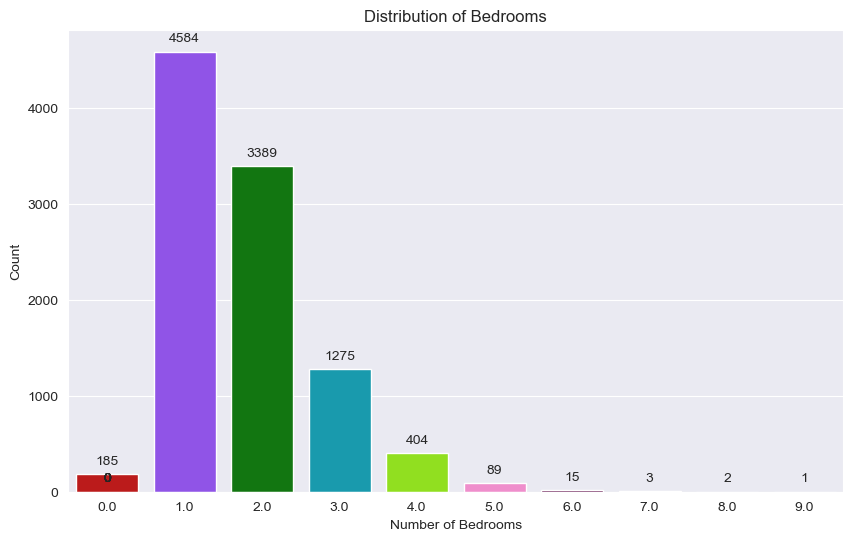

In [630]:
# Exploring feature 'bedrooms'
# rint(df_1.bedrooms.value_counts())
count_of_bedrooms = df_1.bedrooms.value_counts()
# Define a custom color palette using colorcet and seaborn
palette = sns.color_palette(cc.glasbey, n_colors=len(count_of_bedrooms))

# Create a bar plot using Seaborn with 'bedrooms' as hue and custom color palette
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=count_of_bedrooms.index, y=count_of_bedrooms.values, hue=count_of_bedrooms.index, palette=palette, errorbar=None, dodge=False)
plt.title('Distribution of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

# Add annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.legend().remove()  # Remove legend so we dont get the warning error
plt.show()



#### From the bar plot above we can see that the mose popular apartment for rent are 1 bedroom, 2 bedroom or 3 bedroom.

In [631]:
# Because there are 9 categorises of bedrooms it's logical to convert them into category for memory efficiency in modelling part
# Convert 'bedrooms' column to categorical data type
df_1['bedrooms'] = df_1['bedrooms'].astype('category')

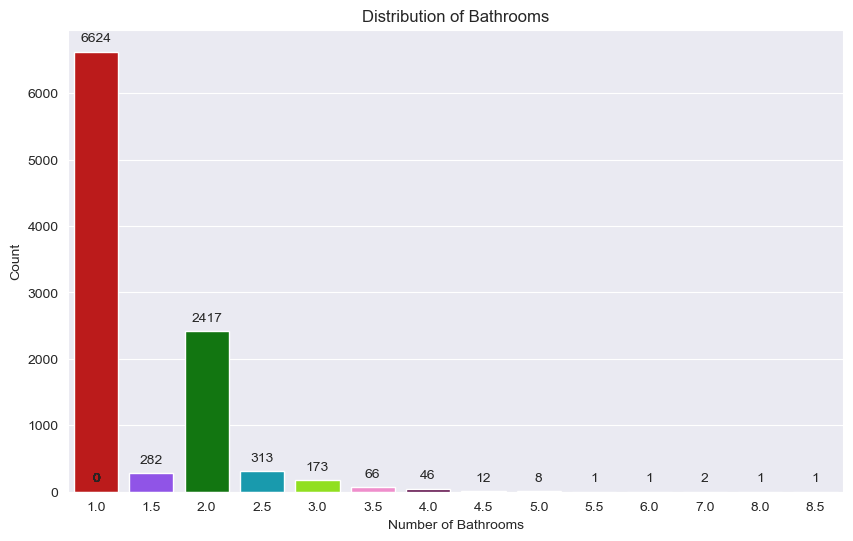

In [633]:
# Exploring feature 'bathrooms' 
# print(df_1['bathrooms'].value_counts())
count_of_bathrooms = df_1['bathrooms'].value_counts()

# Define a custom color palette using colorcet and seaborn
palette = sns.color_palette(cc.glasbey, n_colors=len(count_of_bathrooms))

# Create a bar plot using Seaborn with 'bedrooms' as hue and custom color palette
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=count_of_bathrooms.index, y=count_of_bathrooms.values, hue=count_of_bathrooms.index, palette=palette, errorbar=None, dodge=False)
plt.title('Distribution of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

# Add annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.legend().remove()  # Remove legend so we dont get the warning error
plt.show()

In [634]:
# Similarly to bedrooms we can convert bathrooms to category type for the same reasons
df_1['bathrooms'] = df_1['bathrooms'].astype('category')

In [567]:
# Convert Unix timestamps to datetime objects
df_1['time'] = pd.to_datetime(df_1['time'], unit='s')

# After careful analysis its decide to drop 'price_type' colum, because payment method is monthly across all the records 
# So we can make a general assumption that data consists of monthly payments only
df_1 = df_1.drop(columns=['price_type'])
df_2 = df_1.copy()


In [651]:
df_1.columns

Index(['category', 'bathrooms', 'bedrooms', 'has_photo', 'pets_allowed',
       'price', 'price_type', 'square_feet', 'cityname', 'state', 'latitude',
       'longitude', 'source', 'time', 'amenity_class'],
      dtype='object')

In [644]:
# Load the shapefile of US states
us_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a scatter plot of latitude and longitude coordinates
plt.figure(figsize=(10, 8))
us_states.plot(ax=plt.gca(), color='lightgrey', edgecolor='black')
plt.scatter(df_1['lon'], df_1['lat'], c=df_1['price'], cmap='viridis', alpha=0.5, s=10)

# Add colorbar
plt.colorbar(label='Price')

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('US Map with Coordinates Colored by Price')

# Show plot
plt.show()

NameError: name 'gpd' is not defined

## Model building